# Fast Neural Style Transfer 

Using the tensorflow tutorial, I made my own neural transfer images

## Setup

Import TF-2 and relevant dependencies

In [1]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))

TF Version:  2.6.0
TF-Hub version:  0.12.0
Eager mode enabled:  True
GPU available:  []


In [2]:
# crop center of image so that all images are the same size
# code used from https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()


## Import TF-Hub module

In [4]:
# Load TF-Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

## Image stylization

## Let's try it on more images

In [19]:
# I kept most of the style images to play around

content_urls = dict(
    lemongrab = 'https://i.ytimg.com/vi/RKkMKbocjOA/maxresdefault.jpg',
    dog = 'https://i.ytimg.com/vi/v0fGobgF2Ns/hqdefault.jpg',
)


style_urls = dict(
    jld = 'https://lh3.googleusercontent.com/proxy/wfHMcxMq8b4QrbaBpFBg-G1foOhruozAoDiQR9WBlnW6e-quLXWMJYrRVMmuDpdMgwfFgQM_qZ6RvA84N6U6aDw_hP1vPGMw30acNIkD1T_alSar1SR1Eog',
    monet_parasol = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Claude_Monet_-_Woman_with_a_Parasol_-_Madame_Monet_and_Her_Son_-_Google_Art_Project.jpg/1648px-Claude_Monet_-_Woman_with_a_Parasol_-_Madame_Monet_and_Her_Son_-_Google_Art_Project.jpg',
    kanagawa_great_wave='https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg',
    kandinsky_composition_7='https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg',
    hubble_pillars_of_creation='https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg',
    van_gogh_starry_night='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg',
    turner_nantes='https://upload.wikimedia.org/wikipedia/commons/b/b7/JMW_Turner_-_Nantes_from_the_Ile_Feydeau.jpg',
    munch_scream='https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg',
    picasso_demoiselles_avignon='https://upload.wikimedia.org/wikipedia/en/4/4c/Les_Demoiselles_d%27Avignon.jpg',
    picasso_violin='https://upload.wikimedia.org/wikipedia/en/3/3c/Pablo_Picasso%2C_1911-12%2C_Violon_%28Violin%29%2C_oil_on_canvas%2C_Kr%C3%B6ller-M%C3%BCller_Museum%2C_Otterlo%2C_Netherlands.jpg',
    picasso_bottle_of_rum='https://upload.wikimedia.org/wikipedia/en/7/7f/Pablo_Picasso%2C_1911%2C_Still_Life_with_a_Bottle_of_Rum%2C_oil_on_canvas%2C_61.3_x_50.5_cm%2C_Metropolitan_Museum_of_Art%2C_New_York.jpg',
    fire='https://upload.wikimedia.org/wikipedia/commons/3/36/Large_bonfire.jpg',
    derkovits_woman_head='https://upload.wikimedia.org/wikipedia/commons/0/0d/Derkovits_Gyula_Woman_head_1922.jpg',
    amadeo_style_life='https://upload.wikimedia.org/wikipedia/commons/8/8e/Untitled_%28Still_life%29_%281913%29_-_Amadeo_Souza-Cardoso_%281887-1918%29_%2817385824283%29.jpg',
    derkovtis_talig='https://upload.wikimedia.org/wikipedia/commons/3/37/Derkovits_Gyula_Talig%C3%A1s_1920.jpg',
    amadeo_cardoso='https://upload.wikimedia.org/wikipedia/commons/7/7d/Amadeo_de_Souza-Cardoso%2C_1915_-_Landscape_with_black_figure.jpg'
)

content_image_size = 384
style_image_size = 256
content_images = {k: load_image(v, (content_image_size, content_image_size)) for k, v in content_urls.items()}
style_images = {k: load_image(v, (style_image_size, style_image_size)) for k, v in style_urls.items()}
style_images = {k: tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME') for k, style_image in style_images.items()}


1261568/1246477 [==============================] - 0s 0us/step


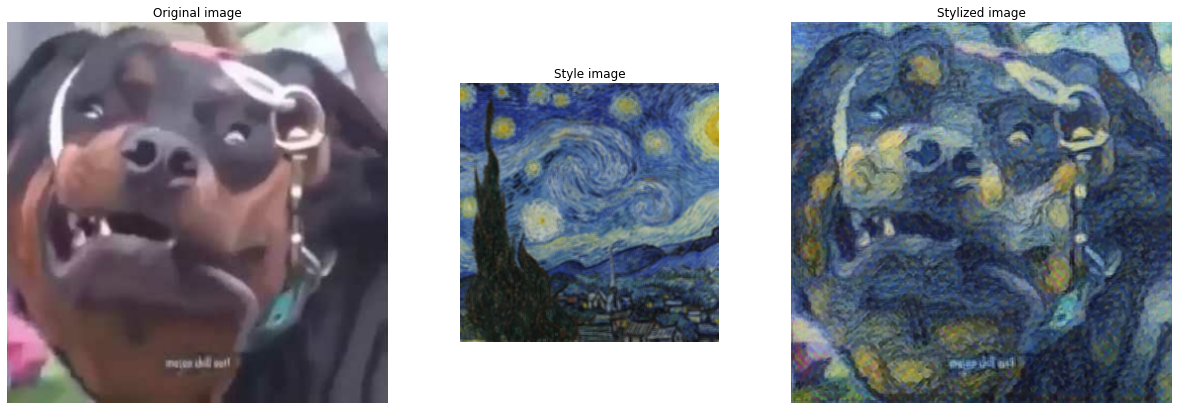

In [24]:
content_name = 'dog'  
style_name = 'van_gogh_starry_night'  

stylized_image = hub_module(tf.constant(content_images[content_name]),
                            tf.constant(style_images[style_name]))[0]

show_n([content_images[content_name], style_images[style_name], stylized_image],
       titles=['Original image', 'Style image', 'Stylized image'])

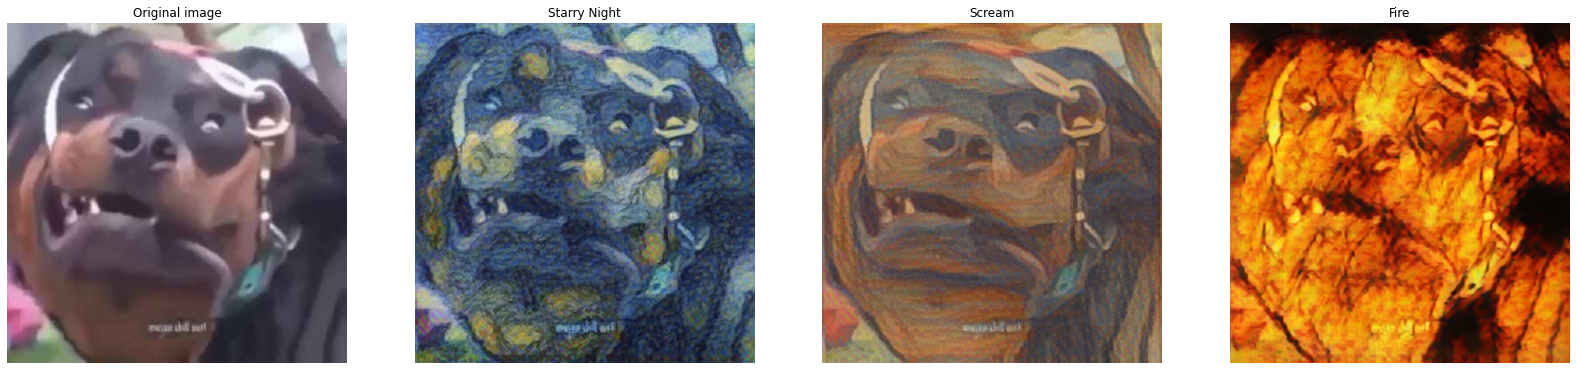

In [33]:
stylized_image1 = hub_module(tf.constant(content_images['dog']),
                            tf.constant(style_images['van_gogh_starry_night']))[0]
stylized_image2 = hub_module(tf.constant(content_images['dog']),
                            tf.constant(style_images['munch_scream']))[0]
stylized_image3 = hub_module(tf.constant(content_images['dog']),
                            tf.constant(style_images['fire']))[0]
show_n([content_images['dog'],stylized_image1,stylized_image2,stylized_image3],titles=['Original image', 'Starry Night','Scream', 'Fire'])